<a href="https://colab.research.google.com/github/eunhobang/Personal-Project/blob/main/LSTM_time_series_prediction_Pytorch_sine_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [2]:
X_train = np.arange(0,100,0.5)
y_train = np.sin((X_train))

In [3]:
X_test = np.arange(100,200,0.5)
y_test = np.sin(X_test)

n_features = 1

train_series = y_train
test_series = y_test

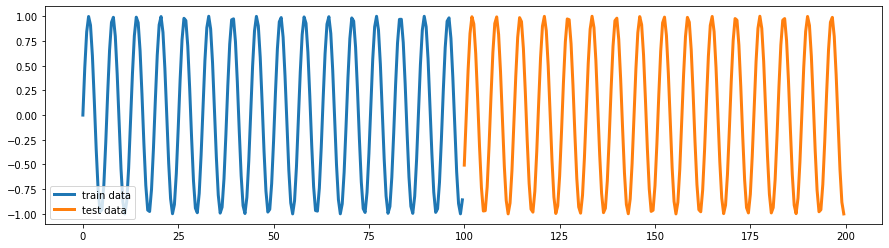

In [5]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
ax.plot(X_train, y_train, lw=3, label='train data')
ax.plot(X_test, y_test, lw=3, label='test data')
ax.legend(loc='lower left')
plt.show()

Need to convert numpy arrays to Torch tensors

In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

In [7]:
train_series = torch.from_numpy(train_series)
test_series = torch.from_numpy(test_series)

In [8]:
look_back = 20

train_dataset = []
train_labels = []
for i in range(len(train_series)-look_back):
  train_dataset.append(train_series[i:i+20])
  train_labels.append(train_series[i+20])

train_dataset = torch.stack(train_dataset).unsqueeze(0)
train_labels = torch.stack(train_labels).unsqueeze(0).unsqueeze(2)

In [9]:
class Net(nn.Module):
  def __init__(self, n_neurons, input_shape):
    super(Net, self).__init__()

    self.fc1 = nn.Linear(input_shape, n_neurons)
    self.fc = nn.Linear(n_neurons, 1)

  def forward(self, x):
    out = self.fc1(x)
    out = self.fc(out)
    return out

Training

In [11]:
n_neurons = 4

model = Net(n_neurons, look_back).double()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_curve = []
for epoch in range(300):
  loss_total = 0

  model.zero_grad()

  predictions = model(train_dataset)

  loss = loss_function(predictions, train_labels)
  loss_total += loss.item()
  loss.backward()
  optimizer.step()
  loss_curve.append(loss_total)

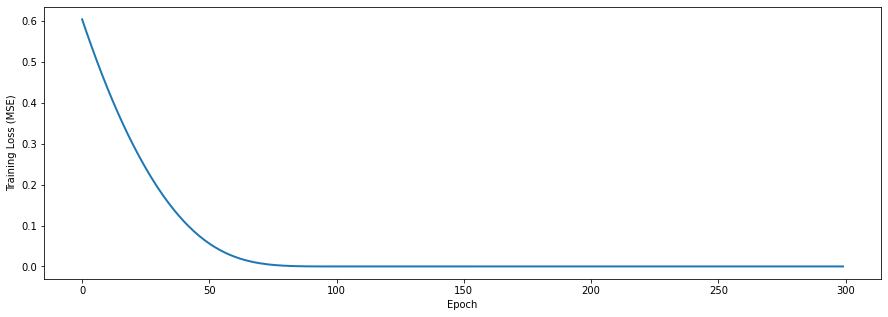

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(loss_curve, lw=2)
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss (MSE)")
plt.show()

Prediction

In [13]:
test_dataset = [test_series[i:i+20] for i in range(len(train_series)-look_back)]
test_dataset = torch.stack(test_dataset).unsqueeze(0)

with torch.no_grad():
  test_predictions = model(test_dataset).squeeze()

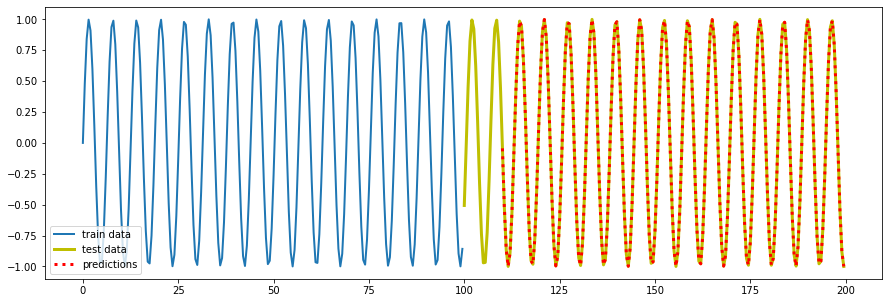

In [14]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();


Extrapolation

In [16]:
extrapolation = []
seed_batch = test_series[:20].reshape(1,1,20)
current_batch = seed_batch
with torch.no_grad():
  for i in range(180):
    predicted_value = model(current_batch)
    extrapolation.append(predicted_value.item())
    current_batch = torch.cat((current_batch[:,:,1:], predicted_value),axis=2)

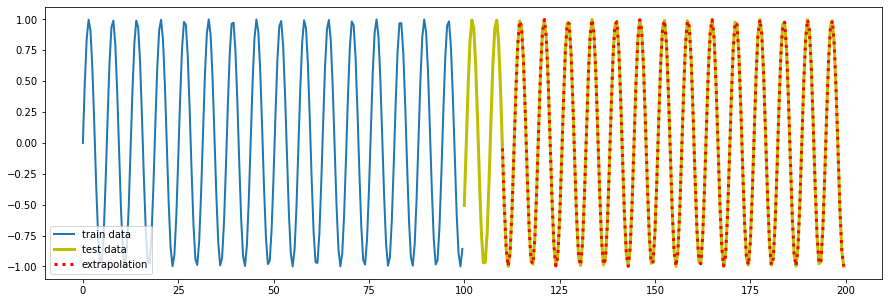

In [17]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,extrapolation, lw=3, c='r',linestyle = ':', label='extrapolation')
ax.legend(loc="lower left")
plt.show()

Sine wave + 3rd harmonic + 5th harmonic
- Let us complicate things a little by now adding the third and fifth harmonics to the input data

In [18]:
X_train = np.arange(0,50,0.5) 
y_train = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

X_test  = np.arange(50,100,0.5) 
y_test  = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

train_series = y_train
test_series  = y_test

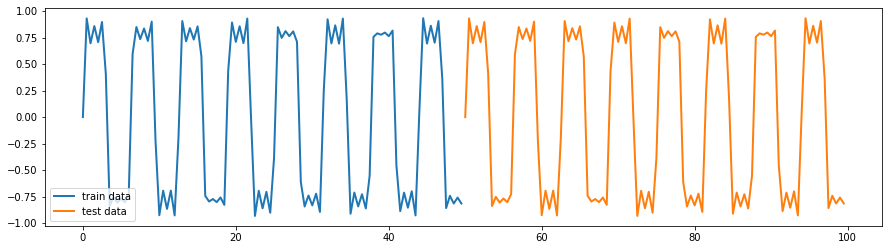

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test, y_test,  lw=2, label='test data')
ax.legend(loc="lower left")
plt.show();

https://www.kaggle.com/code/seangribben/lstm-time-series-prediction-pytorch-sine-wave/notebook